# 🧠 Brain Tumor Classification - EfficientNetB02
# Author: Lincoln Dibler | Model: EffNet | Purpose: Train and evaluate CNN with modular pipeline


# 1.) Imports

In [ ]:
BASE_DIR = '/content/drive/MyDrive/BrainTumorClassification'
TRAIN_DIR = f'{BASE_DIR}/data/Training'
TEST_DIR = f'{BASE_DIR}/data/Testing'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/BrainTumorClassification')

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input
from utils import count_images_per_class, plot_random_images_per_class, create_generators
from models import build_effnet_model, train_model
from evaluation import ModelEvaluator, gradcam_samples_by_class
from utils import save_model_to_drive, load_model_from_drive
import os

# 2.) Data Inspections

meningioma: 1339 images
glioma: 1321 images
notumor: 1595 images
pituitary: 1457 images


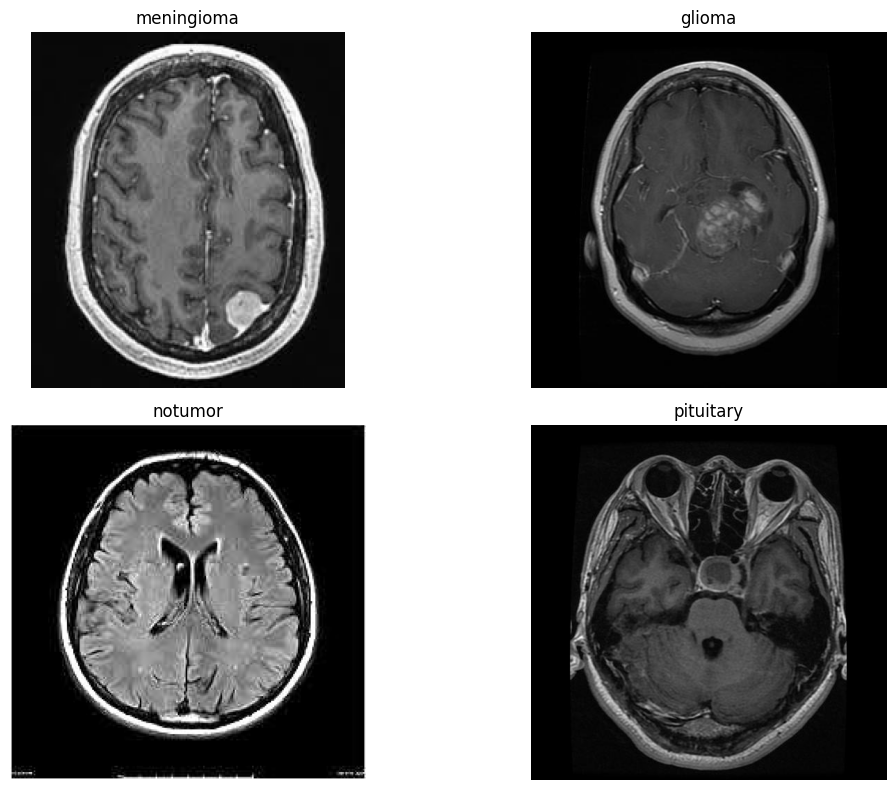

In [ ]:
count_images_per_class(TRAIN_DIR)
plot_random_images_per_class(TRAIN_DIR)

# 3.) Generator Setup

In [ ]:
IMG_SIZE = (240, 240)
BATCH_SIZE = 32
EPOCHS = 10

train_gen, val_gen, test_gen = create_generators(
    train_dir= TRAIN_DIR,
    test_dir=TEST_DIR,
    img_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    preprocessing=preprocess_input  # MobileNetV2 uses standard scaling
)


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


# 4.) Build and Train Model

In [ ]:
model = build_effnet_model(img_size=IMG_SIZE)
model, history = train_model(model, train_gen, val_gen, test_gen, epochs=EPOCHS)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 960s 7s/step - accuracy: 0.3868 - loss: 1.2836 - val_accuracy: 0.5285 - val_loss: 1.1185
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 496s 3s/step - accuracy: 0.6648 - loss: 0.9238 - val_accuracy: 0.5951 - val_loss: 1.0106
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 444s 3s/step - accuracy: 0.7235 - loss: 0.7656 - val_accuracy: 0.6556 - val_loss: 0.9325
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 496s 3s/step - accuracy: 0.7794 - loss: 0.6564 - val_accuracy: 0.6906 - val_loss: 0.8752
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 442s 3s/step - accuracy: 0.8011 - loss: 0.6045 - val_accuracy: 0.7187 - val_loss: 0.8289
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 491s 3s/step - accuracy: 0.8137 - loss: 0.5583 - val_accuracy: 0.7239 - val_loss: 0.7920
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 445s 3s/step - accuracy: 0.8373 - loss: 0.5140 - val_accuracy: 0.7309 - val_loss: 0.7656
Epoch 8/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 448s 3s/step - accuracy: 0.8512 - loss: 0.4860 - val_accu

# 5.) Save Model

In [ ]:
save_model_to_drive(model, model_name='effnet_model')

✅ Model saved to Drive at: /content/drive/MyDrive/BrainTumorClassification/saved_models/effnet_model.keras


# 6.) Evaluate Results

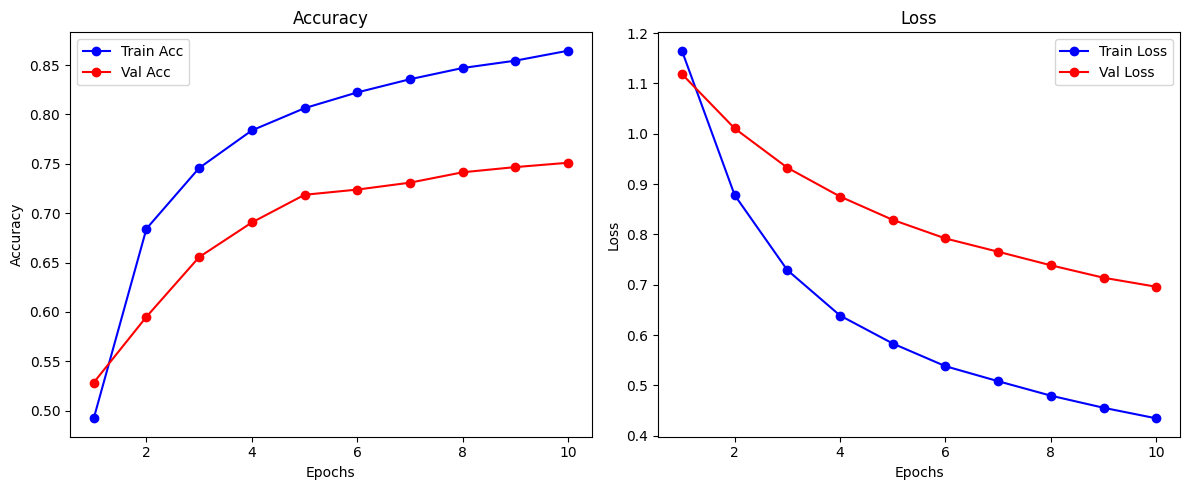

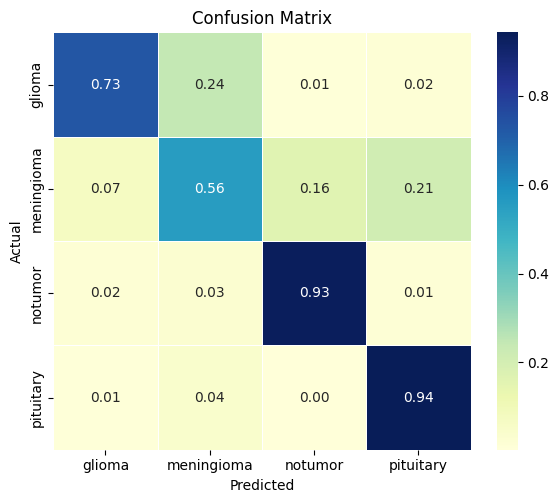

              precision    recall  f1-score   support

      glioma       0.87      0.73      0.79       300
  meningioma       0.63      0.56      0.59       306
     notumor       0.88      0.93      0.90       405
   pituitary       0.79      0.94      0.86       300

    accuracy                           0.80      1311
   macro avg       0.79      0.79      0.79      1311
weighted avg       0.80      0.80      0.80      1311



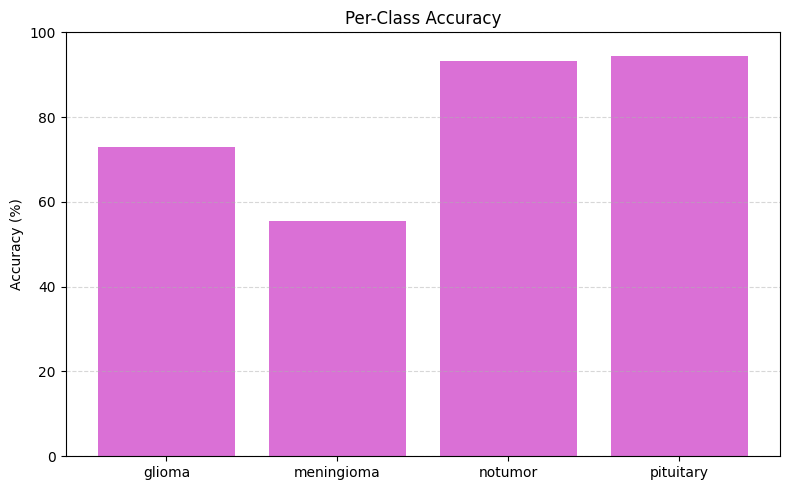

In [ ]:
class_names = list(test_gen.class_indices.keys())

evaluator = ModelEvaluator(
    model=model,
    history=history,
    test_gen=test_gen,
    class_names=class_names,
    input_size=IMG_SIZE,
    preprocess_fn=None,
    last_conv_layer='Conv_1'
)

evaluator.plot_training_curves()
evaluator.plot_confusion_matrix()
evaluator.show_classification_report()
evaluator.plot_per_class_accuracy()


# 7.) Grad-Cam Sampling

In [ ]:
gradcam_samples_by_class(evaluator, root_dir='data/Testing', max_examples=1)

🔍 Sampling Grad-CAMs: 1 correct + 1 incorrect per class

✅ glioma - Correct


NameError: name 'os' is not defined